In [1]:
from PIL import Image, ImageDraw, ImageFont
import textwrap
import numpy as np
import random

In [2]:
# Essential variables
w, h = (512, 512)
padding = 12

### Creating an empty image with wrapped text

In [3]:
# Random long string
text = "Number 1"
for i in range(2, 60):
    text += ', Number ' + str(i)

### More Code

In [4]:
def translate(value, leftMin, leftMax, rightMin, rightMax):
    # Figure out how 'wide' each range is
    leftSpan = leftMax - leftMin
    rightSpan = rightMax - rightMin

    # Convert the left range into a 0-1 range (float)
    valueScaled = float(value - leftMin) / float(leftSpan)

    # Convert the 0-1 range into a value in the right range.
    return round(rightMin + (valueScaled * rightSpan))

In [5]:
def round_to_even(num):
    if num % 2 == 0:
        return num
    else:
        return num - 1

In [6]:
def round_to_odd(num):
    if num % 2 != 0:
        return num
    else:
        return num + 1

In [15]:
def generate_name():
    
    word1 = ['grandmas','aunties','my','your','forbidden','extra','stupidly']
    word2 = ['big','little','tangy','bougie','simple','humble','bad','delicious']
    
    text = ''
    
    if random.randint(1,6) != 6:
        text += random.choice(word1) + '_'
    if random.randint(1,6) != 6:
        text += random.choice(word2) + '_'
        
    text += 'beans_' + str(random.randint(1,700)) + '_of_' + str(random.randint(1000,5000))
    
    return text

In [20]:
generate_name()

'forbidden_beans_551_of_2656'

In [12]:
def encode(bean_img, text):
    
    # Load font
    font = ImageFont.load_default()

    # Font is monospaced, so will always have same dimensions
    char_w, char_h = font.getsize('1')
    line_length = int((w - padding) / char_w)
    text_height = int((h - padding) / char_h)
    max_chars = line_length * text_height
    
    # Check if text to be encoded might be too long
    assert len(text) <= max_chars, "Text is too long"
    
    # Wrap text
    text = textwrap.fill(text=text, width=line_length)
    
    # Check if the wrapped text might be too long
    assert text.count('/n') < text_height, "Text is too long"
    
    # Create b&w image with text
    img = Image.new(size=(w,h), mode='RGB')
    draw = ImageDraw.Draw(img)
    draw.text(xy=(padding / 2, padding / 2), text=text, font=font, fill="#FFFFFF")
    
    # Get bean and text images as pixel array
    new_img = bean_img.copy()
    bean_array = np.array(list(new_img.getdata()))
    img_array = np.array(list(img.getdata()))
    
    # For each pixel in the bean and text image
    for idx, (bean_pix, img_pix) in enumerate(zip(bean_array, img_array)):
        
        # If there is a pixel representing text, round the R value to odd
        if np.array_equal(img_pix, [255, 255, 255]):
            bean_array[idx][0] = round_to_odd(bean_pix[0])
        else: # Round the R value to even
            bean_array[idx][0] = round_to_even(bean_pix[0])
    
    # Reshape array and turn into image
    bean_array = np.reshape(np.array(bean_array, dtype=np.uint8), (w, h, 3))
    encoded_img = Image.fromarray(bean_array, mode='RGB')
    
    return encoded_img

In [21]:
bean_img = Image.open('images/baked/0.png', mode='r')
new_img = bean_img.copy()

encoded_img = encode(new_img, text)

In [22]:
encoded_img.show()

In [88]:
translate(6, 1, 10, 10, 100)

60

In [23]:
def decode(encoded_img):
    
    # Get encoded img as a pixel array
    encoded_array = np.array(list(encoded_img.getdata()))
    
    # Create blank image array
    blank_array = np.full(encoded_array.shape, [255,255,255])
    
    # Update blank image array white pixels where text should be
    for idx, encoded_pix in enumerate(encoded_array):
        if encoded_pix[0] % 2 != 0:
            blank_array[idx] = [0, 0, 0]
        else:
            blank_array[idx] = [translate(x, 0, 255, 200, 255) for x in encoded_pix]
            
    nonblank_array = np.reshape(np.array(blank_array, dtype=np.uint8), (w, h, 3))
    decoded_img = Image.fromarray(nonblank_array, mode='RGB')
    
    return decoded_img

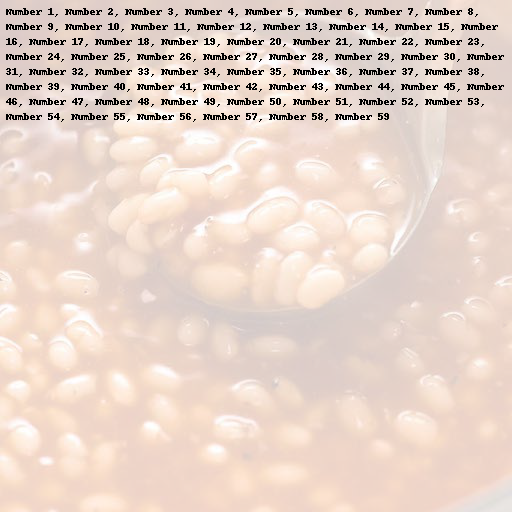

In [24]:
decode(encoded_img)